# 畳み込みニューラルネットワーク
- Convolutional Neural Networks   [畳み込みニューラルネットワーク](https://www.tensorflow.org/tutorials/images/cnn?hl=ja)
- カラー画像の学習

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras

In [3]:
def images_plot(images, labels, display_num=10):
    class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck",]
    plt.figure(figsize=(display_num, 1))
    for i in range(display_num):
        plt.subplot(1, display_num, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel(class_names[labels[i][0]])
    plt.show()

In [17]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


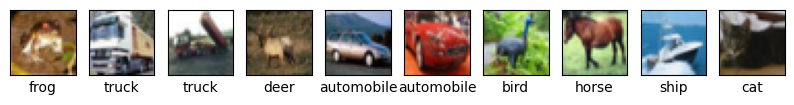

In [15]:
images_plot(train_images, train_labels, 10)

In [22]:
model = keras.models.Sequential()
model.add(keras.Input(shape=(32, 32, 3))),
model.add(keras.layers.Rescaling(1./255)),
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10))

In [23]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

history = model.fit(
    train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), verbose=2
)

Epoch 1/10
1563/1563 - 26s - 16ms/step - accuracy: 0.5285 - loss: 1.3144 - val_accuracy: 0.5655 - val_loss: 1.2024
Epoch 2/10
1563/1563 - 24s - 15ms/step - accuracy: 0.6203 - loss: 1.0767 - val_accuracy: 0.6303 - val_loss: 1.0458
Epoch 3/10
1563/1563 - 24s - 15ms/step - accuracy: 0.6710 - loss: 0.9412 - val_accuracy: 0.6455 - val_loss: 1.0263
Epoch 4/10
1563/1563 - 22s - 14ms/step - accuracy: 0.7056 - loss: 0.8446 - val_accuracy: 0.6685 - val_loss: 0.9687
Epoch 5/10
1563/1563 - 22s - 14ms/step - accuracy: 0.7271 - loss: 0.7838 - val_accuracy: 0.7038 - val_loss: 0.8697
Epoch 6/10
1563/1563 - 22s - 14ms/step - accuracy: 0.7447 - loss: 0.7295 - val_accuracy: 0.6985 - val_loss: 0.8875
Epoch 7/10
1563/1563 - 23s - 15ms/step - accuracy: 0.7590 - loss: 0.6834 - val_accuracy: 0.7196 - val_loss: 0.8503
Epoch 8/10
1563/1563 - 22s - 14ms/step - accuracy: 0.7756 - loss: 0.6403 - val_accuracy: 0.7124 - val_loss: 0.8528
Epoch 9/10
1563/1563 - 23s - 15ms/step - accuracy: 0.7870 - loss: 0.6001 - val_a

In [33]:
model.save('../notebook/TensorFlow_04_CNN.keras')

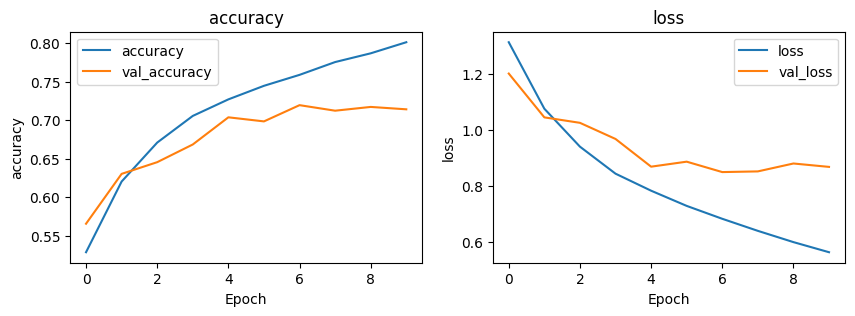

In [42]:
plt.figure(figsize=(10, 3))
for i, k in enumerate(['accuracy', 'loss']):
    plt.subplot(1, 2, i + 1)
    plt.plot(history.history[f'{k}'], label=f'{k}')
    plt.plot(history.history[f'val_{k}'], label = f'val_{k}')
    plt.xlabel('Epoch')
    plt.ylabel(f'{k}')
    # plt.ylim([0.5, 1])
    plt.title(f'{k}')
    plt.legend()
plt.show()

In [45]:
df = pd.DataFrame(history.history)
df

,accuracy,loss,val_accuracy,val_loss
0,0.52846,1.314355,0.5655,1.202388
1,0.62032,1.076734,0.6303,1.045824
2,0.67096,0.941191,0.6455,1.026322
3,0.70562,0.844643,0.6685,0.968692
4,0.72712,0.783793,0.7038,0.869657
5,0.74474,0.729497,0.6985,0.887526
6,0.75898,0.683398,0.7196,0.850313
7,0.77562,0.640314,0.7124,0.852762
8,0.78698,0.600074,0.7173,0.881002
9,0.80140,0.563951,0.7142,0.868854


## Keras サブクラス化 API と tf.GradientTapeを使用

In [60]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

TensorFlow version: 2.17.0


## データ読み込み

In [50]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


## 次元を追加してCNNに対応できるようにする

In [51]:
train_images = train_images[..., tf.newaxis].astype("float32")
test_images = test_images[..., tf.newaxis].astype("float32")
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


## TensorFlowのデータパイプラインの作成
- train_images と train_labels を一つのデータとして扱う

In [52]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(32)

## TensorFlow NNモデルのカスタム定義をする

In [62]:
class MyModel(Model):
    def __init__(self):
        super().__init__()
        self.conv1 = Conv2D(32, 3, activation='relu')
        self.flatten = Flatten()
        self.d1 = Dense(32, activation='relu')
        self.d2 = Dense(10)

    def call(self, x):
        x = self.rescaling(x)
        x = self.conv1(x)
        x = self.flatten(x)
        x = self.d1(x)
        return self.d2(x)
    
model = MyModel()

In [54]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

In [55]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [56]:
@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images, training=True)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(labels, predictions)

In [57]:
@tf.function
def test_step(images, labels):
    predictions = model(images, training=False)
    t_loss = loss_object(labels, predictions)

    test_loss(t_loss)
    test_accuracy(labels, predictions)

In [58]:
EPOCHS = 5

for epoch in range(EPOCHS):

    train_loss.reset_state()
    train_accuracy.reset_state()
    test_loss.reset_state()
    test_accuracy.reset_state()

        # トレーニングの進捗バー
    print(f"\nEpoch {epoch + 1}/{EPOCHS} - Training:")
    for images, labels in tqdm(train_ds, desc="Training", unit="batch"):
        train_step(images, labels)
    # for images, labels in train_ds:
    #     train_step(images, labels)

    print(f"\nEpoch {epoch + 1}/{EPOCHS} - Testing:")
    for test_images, test_labels in tqdm(test_ds, desc="Testing", unit="batch"):
        test_step(test_images, test_labels)
    # for test_images, test_labels in test_ds:
    #     test_step(test_images, test_labels)

    print(
        f"Epoch {epoch + 1}, "
        f"Loss: {train_loss.result():.05f}, "
        f"Accuracy: {train_accuracy.result():.03%}, "
        f"Test Loss: {test_loss.result():.05f}, "
        f"Test Accuracy: {test_accuracy.result():.03%}"
    )

Epoch 1, Loss: 0.17414, Accuracy: 94.903%, Test Loss: 0.06402, Test Accuracy: 98.157%
Epoch 2, Loss: 0.06142, Accuracy: 98.067%, Test Loss: 0.03958, Test Accuracy: 98.800%
Epoch 3, Loss: 0.03758, Accuracy: 98.830%, Test Loss: 0.02307, Test Accuracy: 99.292%
Epoch 4, Loss: 0.02644, Accuracy: 99.143%, Test Loss: 0.01342, Test Accuracy: 99.610%
Epoch 5, Loss: 0.01697, Accuracy: 99.442%, Test Loss: 0.01280, Test Accuracy: 99.585%


In [59]:
model.summary()

Model: "my_model_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (32, 26, 26, 32)       │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (32, 21632)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (32, 32)               │       692,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (32, 10)               │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 692,906 (2.64 MB)

 Trainable params: 692,906 (2.64 MB)

 Non-trainable params: 0 (0.00 B)